In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-34.646149344230075 35.40406637800561
41.887822140894315 46.80818151497232
-57.24772607573953 93.48269406525122
-89.40193168982717 -37.98025427356902
27.386716387727432 -1.3113973372011287
5.115289976616111 158.23323891067474
62.537500449116294 -104.6022202531859
-75.89991610850888 -140.45998345592494
59.76769137966076 162.6329712004935
63.24773477162515 34.05255278778736
25.075449680748576 17.038205590191012
72.92756824031918 7.133643947582556
66.02377535606328 -166.2392076153568
29.30346851533392 -173.57862425545088
87.47332300727516 68.83617194242578
-86.14086676552802 -11.736507452338458
34.567202679435056 57.862627720924365
-67.3874144343614 155.30302506256726
-39.57638660543696 43.875289196004616
59.85814399335507 -51.46117346836371
35.642551140615794 -2.176513647862322
86.4432944458307 -44.279703749826325
-21.880197491169895 -177.79593723537718
19.9681305026741 -68.34391256346987
60.45205729725774 -65.1694507070169
40.53079775624943 -149.02903315065012
-7.374923058107356 68.0368

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

79

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=b302b1c49258578c41414d021d1d5d3e


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | margate
Processing Record 2 of Set 1 | zaqatala
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | adrar
Processing Record 6 of Set 1 | namatanai
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | ossora
Processing Record 10 of Set 1 | segezha
Processing Record 11 of Set 1 | marzuq
Processing Record 12 of Set 1 | sorland
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | tabas
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | melilla
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | vaini
Processing Record 24 of Set 1 | samana
Processing Record 25 of Set 

In [12]:
len(city_data)

73

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Margate,51.3813,1.3862,294.75,77,94,1.79,GB,2022-08-15 19:35:58
1,Zaqatala,41.6336,46.6433,300.41,39,0,6.17,AZ,2022-08-15 19:35:59
2,Busselton,-33.6500,115.3333,289.20,86,100,8.73,AU,2022-08-15 19:27:54
3,Ushuaia,-54.8000,-68.3000,277.96,60,40,5.14,AR,2022-08-15 19:26:42
4,Adrar,20.5022,-10.0711,312.85,8,0,2.74,MR,2022-08-15 19:30:57
5,Namatanai,-3.6667,152.4333,298.23,82,100,1.44,PG,2022-08-15 19:36:01
6,La Ronge,55.1001,-105.2842,297.29,60,40,3.09,CA,2022-08-15 19:35:07
7,Rikitea,-23.1203,-134.9692,296.30,76,0,7.98,PF,2022-08-15 19:29:19
8,Ossora,59.2353,163.0719,285.66,98,100,3.10,RU,2022-08-15 19:36:02
9,Segezha,63.7415,34.3222,290.58,70,82,2.88,RU,2022-08-15 19:36:03


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

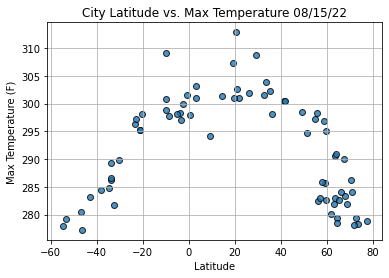

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

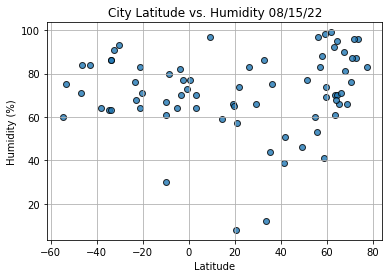

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

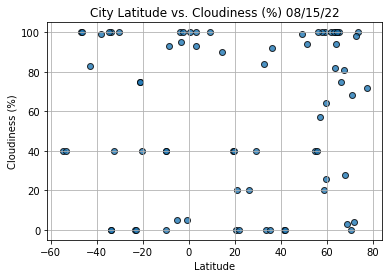

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

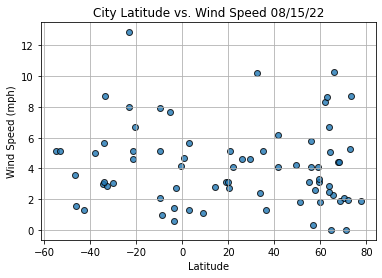

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()